In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 6-1 표본과 경험적 분포 요약


In [2]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

## 개념

- 모집단 : 분석에 필요한 전체자료
- 표본 : 모집단의 일부분
    - 확률표본 : 단순임의추출을 통해 추출된 표본
    - 편의표본 : 개체가 표본에 포함되는 가능성을 알 수 없는 표본
- 단순임의추출(simple random sampling) : 모집단의 모든 개체가 표본에 속할 가능성이 동일하도록 하는 추출하는 방법.
- 경험적 분포 : 표본에 속한 **데이터의 분포**, 경험적이라는 의미는 추출된 **관측값들의 분포**라는 의미.
- 대수의 법칙
    - **표본의 크기** **증가**할수록 **확률표본에서 얻은 정보**는 **모집단에 대한 정보**와 점점 **가까워진다.**
    - **확률표본**의 **경험적 분포**는 **표본의 수가 증가**할수록 **모집단의 분포**와 점점 **유사**해진다.`
    - keyword : `확률표본`,`표본의 크기`,`증가`,`모집단의 분포`,`유사`
- 확률표본의 정확한 정의 : 모집단에 속한 개체들이 표본에 포함되는 확률이 미리 정해져 있으며 이러한 확률분포로부터 임의로 추출된 표본을 의미한다.

## fake 가능성
- `확률표본`이라는 키워드가 언급되어야 함. 표본의 크기가 크면 클수록 `확률표본`이어야 함.
    - 그냥 `표본은`은 안됨. 편의표본일 수 있기 때문.

## 코드

- 크키가 $n$인 확률표본 추출 : df.sample(n,replace = False,random_state)
    - n : 표본의 크기,replace : 복원추출여부
    - ex)bike_sample_100 = bike.sample(n=100,replace=False,random_state = 1)


- 표본의 크기가 점점 커지면 확룔표본의 평균이 모집단의 평균에 가까워 지는 것 시각화
    - 표본의 크기는 10에서 2010까지 20step단위로 끊어서 확인

In [4]:
n = np.arange(10,2021,20)

In [5]:
sample_mean = pd.DataFrame({"n":n,"sample_mean":np.zeros(len(n))})
#n : 다양한 표본의 크기들, 표본의 크기들이 담긴 array인 n이 value가 됨
#sample_mean : 다양한 크기의 표본에 대한 sample_mean이 담길 column, 일단 다양한 표본조합 n만큼 초기화
#n의 길이만큼 초기화, n은 지금 다양한 표본의 크기들이 들어있는 리스트
#우리는 다양한 표본의 크기에 대해서 sample mean을 계산해봐야 함.

for i,sample_size in enumerate(n):
    sample_mean.loc[i,"sample_mean"] = bike.sample(n=sample_size,replace=False)["이용거리"].mean() 
    #dataframe에서 sample하면 모든 컬럼이 전부 포함된 채로 있음
    #따라서 mean을 계산할 때, 특정컬럼을 가져와 줘야 함.

In [6]:
sample_mean.head(5)

,n,sample_mean
0,10,2763.000000
1,30,3513.333333
2,50,6504.400000
3,70,4424.285714
4,90,4201.000000


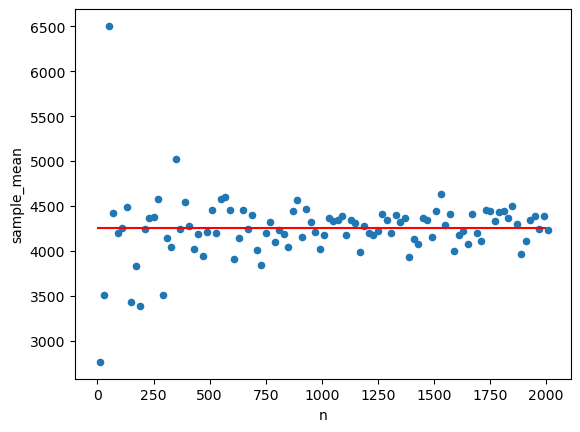

In [7]:
sample_mean.plot.scatter(x="n",y="sample_mean")
plt.hlines(y=4253.336228, xmin=0, xmax=2000, colors='r')
plt.show()

# 6-2 통계량의 분포 요약

In [8]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

## 개념

|용어|기호|정의|예|
|---|---|---|---|
|모집단(population)|P|관심이 있는 전체집단|모든 선거구 주민|
|모집단의 수 |N|전체집단에 속한 개체 수|모든 선거구 주민의 수|
|모수(parameter) |$\theta$|모집단의 특성값|모집단의 지지율|
|표본(sample) |S|모집단의 부분 집합|표본으로 추출된 주민|
|표본의 수|n|표본에 속한 개체의 수|표본으로 추출된 선거구 주민의 수|
|표본 통계량(sample statistics)|$\hat{\theta}$|표본의 특성값|표본 지지율|

- 자료 분석의 목적 : 모집단에 대한 특성 즉 `모수`를 알기 위함
- 일반적으로 자료분석은 표본에서 얻은 정보, 즉 표본통계량(=추정량)을 통해서 모수를 추론(추정)
- 왜 자료분석을 모집단에서 안하고 표본을 추출해서 해?
    - 모집단은 크기가 너무 커서 모든 자료를 조사할 수 없음

- 표본으로부터 계산한 통계량도 임의성을 지니며 분포를 가진다. 
    - 모집단으로 부터 random하게 표본이 추출되기 때문임.
- 통계량의 분포를 아는 것이 또 하나의 중요한 topic
    - 왜 구해야해?(시험X)
        - 통계량으로부터 모수를 추측하기 때문
- 정확한 분포는 어떻게 구함?
    - 모집단을 정확히 알고있을때
    1. 모집단으로부터 가능한 모든 표본의 조합을 구하여
    2. 나올 수 있는 모든 표본통계량과 그에 대응하는 확률을 계산해야 함
- 하지만 못 구하는 이유?
    - 모집단을 정확히 알아도, 가능한 조합이 경우의 수가 너무 커서 사실상 못구함
    - Q.왜 근데 조합을 먼저 취하고 구해버리냐???..?..??
- 그렇다면 어떻게 해? $\to$ 모의실험을 통해 경험적으로 구해볼 수 있음.
- 경험적분포는 어떻게 구함?
    - 모집단에서 크기가 n인 표본을 뽑고
    - 표본통계량 계산하고 기록
    - 이 과정을 여러번 반복해서 표본통계량의 분포를 구해보기.
- 표본평균의 경험적분포에 대한 매우 중요하고 신기한 특징들
    - 모집단의 분포가 정규분포를 따르지 않더라도 표본의 크기가 크면 클수록
    - 표본평균의 분포가 모양이 좌우가 대칭인 종모양(정규분포)에 가까워지며
    - 분산이 줄어든다.(퍼진정도가 줄어든다.)

## fake 가능성
- 표본의 경험적 분포 vs 표본통계량의 경험적 분포
    - 표본의 경험적 분포는 표본을 구성하는 관측값들의 분포,표본 한 개만 있어도 가능함.
    - 표본통계량의 경험적 분포는 표본에 속한 관측값들로 계산한 하나의 값,분포를 구하려면 여러개의 표본이 있어야 함.$\to$모의실험을 실행하는 이유
- 반드시 확률표본이어야 한다.(비확률표본이면 절대 안된다.)

## 코드

**(정확한 분포 구하기)**

In [9]:
# 1. 가능한 모든 표본 구하기
from itertools import combinations

P = np.array([1,1,0,0,1])
n = 3

all_possible_samples = []
for sample in combinations(P,3):
    all_possible_samples.append(sample)

#2. 모든 표본에 대한 지지율 구하기
from fractions import Fraction

sample_rate = []
for sample in all_possible_samples:
    sample_rate.append(Fraction(sum(sample),n)) #주의,분모 분자 헷갈리면 망함
    #sample_rate.append(Fraction(len(sample)/sum(sample)))#틀린코드 

sample_rate_dist = pd.DataFrame({"sample_rate":sample_rate,"probability":np.repeat(1/len(all_possible_samples),len(sample_rate))})

sample_rate_dist.groupby("sample_rate").sum().reset_index(drop=False).rename(columns = {"sample_rate":"표본지지율"})

,표본지지율,probability
0,1/3,0.3
1,2/3,0.6
2,1,0.1


**(경험적 분포구하기)**

In [10]:
# 모집단을 만든다.
P = np.concatenate((np.ones(6000), np.zeros(4000)), axis=0)
np.mean(P)

0.6

In [11]:
B = 10000
n = 100

simul_sample_rates = pd.DataFrame({"sample_rate":np.zeros(B)})
for i in np.arange(B):
    sample = np.random.choice(P,n)
    simul_sample_rates.loc[i,"sample_rate"] = np.mean(sample)

<AxesSubplot:ylabel='Frequency'>

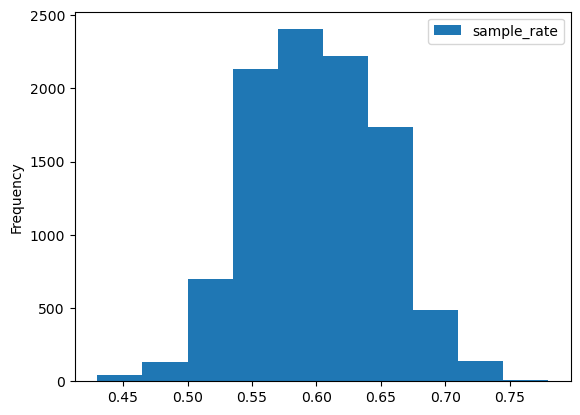

In [12]:
simul_sample_rates.plot.hist()

**(경험적 분포 구하기 - 2)** 생략

# 6.3 추정량의 성질

## 개념
- 통계량 : 표본으로부터 계산된 요약값
- 추정량 : 모수를 추정할 수 있는 통계량
- 추정값 : 관측한 표본으로부터 계산한 추정량의 값
- 추정량의 성질
    1. 추정량은 임의성을 가진다.(확률변수다.)
        - 추정량은 표본으로 계산되고, 표본이 모집단에서 임의적으로 뽑히기 때문이다.
    2. 추정량의 평균
        - 추정값들의 평균은 모수와 같다.(추정값이라고 적혀있음(추정량 X),모수는 모집단의 지지율이 였음)
        - 강의자료에서는 추정량의 평균 = 추정값들의 (표본)평균으로 설명함.
        - $\text{Bias} = \theta - \bar \theta $, 작을수록 좋은 추정량이다.
    3. 추정량의 표준편차
        - 추정값들의 표준편차가 이렇게 된다.(공식있음)
        - 뭐 특별한건 없고 추정량도 임의성을 지니기에(random variable) 분포를 가지며 표준편차도 가진다는 점!.
- 중심극한정리
    - 일반적으로 표본의 수가 50보다 크면 추정량의 분포가 정규분포에 꽤 가깝다.
- 그래서 .. 중심극한정리 어디에 활용?
    - 평균으로부터 +- 2SD에 추정값이 나타날 확률이 95%
    - 위와 동일하게 추정값 +- 2SD에 평균이 나타날 확률이 95%
    - 위와 동일하게 **표본지지율과 모집단 지지율의 차이가 2SD일 확률이 95%이다.**

- 표본오차는 95% 신뢰수준에서 $\pm 3.1%$포인트다.
    - 강의교재에서는 표본오차 = $3.1%$로 나왔지만 $\theta - \hat\theta$를 의미하는 것이라 생각함.
    - Q. 용어 상당히 헷갈림 일단 pass

## 코드

In [13]:
# 모집단의 크기
N = 100000

# 지지하는 유권자의 수 
favor = 60000

# 반대하는 유권자의 수 
opposite = 40000

# 모집단 (1=지지, 0=반대)
P = np.concatenate((np.ones(favor), np.zeros(opposite)), axis=0)
P

array([1., 1., 1., ..., 0., 0., 0.])

In [14]:
B = 10000
n = 1000

estimates = pd.DataFrame({"sample_rate":np.zeros(B)})
for i in np.arange(B):
    sample = np.random.choice(P,n,replace=False)
    estimates.loc[i,"sample_rate"] = np.mean(sample)

In [18]:
AVG = float(estimates.mean())
AVG

0.5999100999999974

In [16]:
SD = float(estimates.std())
SD

0.015371410020378815

In [19]:
[AVG - 2*SD,AVG + 2*SD]

[0.5691672799592398, 0.6306529200407551]

# 붓스트랩

In [8]:
N = 100000
theta = 0.5

favor = int(100000 * theta)
opposite = N - favor
P = np.concatenate((np.ones(favor),np.zeros(opposite)),axis=0)

In [12]:
n = 1000
one_sample = np.random.choice(P,n,replace=False)
one_sample[:10]

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [26]:
B = 100000

bootstrap_estimates = pd.DataFrame({"boot_estimate":np.zeros(B)})
for i in np.arange(B):
    resample = np.random.choice(one_sample,n,replace=True)
    bootstrap_estimates.loc[i,"boot_estimate"] = np.mean(resample)

In [27]:
SD = float(bootstrap_estimates.std())
2 * SD

0.03151285719143887

In [28]:
lower_bound = bootstrap_estimates["boot_estimate"].quantile(0.25)
upper_bound = bootstrap_estimates["boot_estimate"].quantile(0.75)
[lower_bound,upper_bound]

[0.497, 0.519]

In [29]:
hat_theta = np.mean(one_sample)
lower_bound = hat_theta - 2 * SD
upper_bound = hat_theta + 2 * SD
[lower_bound,upper_bound]

[0.47648714280856114, 0.5395128571914389]

In [30]:
hat_theta

0.508

In [34]:
bootstrap_estimates["boot_estimate"].mean()

0.5080417199999819

<AxesSubplot:ylabel='Frequency'>

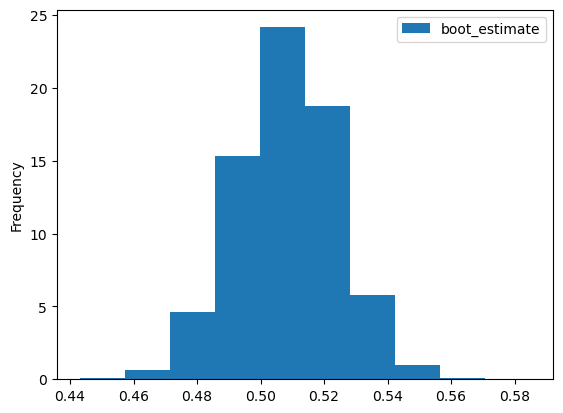

In [35]:
bootstrap_estimates.plot.hist(density=True)

In [69]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")
bike

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
...,...,...,...,...,...,...,...,...,...,...,...
407584,SPB-24072,2019-09-12 08:56:34,240,문래역 4번출구 앞,9,2019-09-12 09:03:37,99999,영남단말기정비,2,6,720.0
407585,SPB-16130,2019-09-18 10:13:09,99999,영남단말기정비,1,2019-09-18 11:38:30,99999,영남단말기정비,1,85,40.0
407586,SPB-03728,2019-09-25 08:00:28,2183,동방1교,7,2019-09-25 08:54:02,99999,영남단말기정비,5,53,12910.0
407587,SPB-08928,2019-09-30 07:49:27,2183,동방1교,10,2019-09-30 09:42:27,99999,영남단말기정비,7,2,0.0


In [70]:
bike2 = bike[ ["이용시간","이용거리"] ].rename(columns={"이용시간":"time", "이용거리":"distance"})

In [71]:
bike2

,time,distance
0,52,8940.0
1,15,1910.0
2,2,30.0
3,98,9610.0
4,90,9450.0
...,...,...
407584,6,720.0
407585,85,40.0
407586,53,12910.0
407587,2,0.0


In [72]:
bike2.describe()

,time,distance
count,407589.000000,407589.000000
mean,30.156827,4253.336228
std,32.065934,5782.673901
min,1.000000,0.000000
25%,8.000000,1200.000000
50%,18.000000,2380.000000
75%,43.000000,5130.000000
max,2479.000000,153490.000000


In [83]:
n=1000
one_sample = bike2.sample(n=1000,replace=False)

In [84]:
one_sample.describe()

,time,distance
count,1000.000000,1000.000000
mean,29.573000,4295.160000
std,31.391944,6355.280258
min,1.000000,0.000000
25%,8.000000,1230.000000
50%,17.000000,2355.000000
75%,43.000000,5035.000000
max,245.000000,86470.000000


In [91]:
B = 1000

estimates = pd.DataFrame({"time_estimates":np.zeros(B),"distance_estimates":np.zeros(B)})
for i in np.arange(B):
    estimates.loc[i,"time_estimates"] = one_sample["time"].sample(n,replace=True,random_state = i).median()
    estimates.loc[i,"distance_estimates"] = one_sample["distance"].sample(n,replace=True,random_state = i).median()
estimates

,time_estimates,distance_estimates
0,18.0,2430.0
1,17.0,2300.0
2,18.0,2340.0
3,17.0,2305.0
4,17.0,2290.0
...,...,...
995,18.0,2360.0
996,16.0,2220.0
997,17.0,2400.0
998,16.0,2345.0


In [92]:
estimates["time_estimates"].quantile(0.025),estimates["time_estimates"].quantile(0.975)

(16.0, 20.0)

In [93]:
float(estimates["distance_estimates"].quantile(0.025)),estimates["distance_estimates"].quantile(0.975)

(2190.0, 2565.125)